## **Customer Segmentation**

**Importing libraries**

In [ ]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

**Importing Train dataset**

In [ ]:

df = pd.read_csv("/content/Train.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


**Data Preprocessing**

Removing the missing values

In [ ]:
data = df.dropna()
data = data.drop(['ID'], axis=1)
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


Converting the  categorical data to numercial data

In [ ]:
data.Gender = pd.Categorical(data.Gender,categories=['Male','Female'],ordered=True).codes

data.Segmentation = pd.Categorical(data.Segmentation,categories=['A','B','C','D']).codes

data.Ever_Married=pd.Categorical(data.Ever_Married,categories=['No','Yes'],ordered=True).codes

data.Graduated=pd.Categorical(data.Graduated,categories=['No','Yes'],ordered=True).codes

data.Spending_Score=pd.Categorical(data.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

data.Var_1=pd.Categorical(data.Var_1,categories=['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','Cat_6','Cat_7'],ordered=True).codes

data.Profession=pd.Categorical(data.Profession,categories=['Artist','Entertainment','Healthcare','Engineer','Doctor','Lawyer','Executive','Homemaker','Marketing'],ordered=True).codes

In [ ]:
data.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0,22,0,2,1.0,0,4.0,3,3
2,1,1,67,1,3,1.0,0,1.0,5,1
3,0,1,67,1,5,0.0,2,2.0,5,1
5,0,1,56,0,0,0.0,1,2.0,5,2
6,0,0,32,1,2,1.0,0,3.0,5,2


Removing the Segmentation column

In [ ]:

X = data.drop(columns = 'Segmentation')
X.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0,22,0,2,1.0,0,4.0,3
2,1,1,67,1,3,1.0,0,1.0,5
3,0,1,67,1,5,0.0,2,2.0,5
5,0,1,56,0,0,0.0,1,2.0,5
6,0,0,32,1,2,1.0,0,3.0,5


Assinging the ***target***  column '**segmentation**' to '**y**'

In [ ]:
y = data["Segmentation"]
y = pd.DataFrame(y)
y.head()

,Segmentation
0,3
2,1
3,1
5,2
6,2


**Importing the test data set**

In [ ]:
X_test = pd.read_csv('/content/Test.csv')
X_test = X_test.drop(['ID'], axis=1)
X_test.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


**Data Preprocessing of Test data**

Printing no.of Null values of in "Gender" column

In [ ]:
print(X_test["Gender"].isnull().sum())

0


Printing the count of each unique occurence in "Graduated" column

In [ ]:
print(X_test["Graduated"].value_counts())

Yes    1602
No     1001
Name: Graduated, dtype: int64


Printing the count of "Graduated" null values

In [ ]:
print(X_test["Graduated"].isnull().sum())

0


filling the null values in "Graduated" column with "Yes"

In [ ]:
X_test['Graduated'].fillna('Yes',inplace=True)

In [ ]:
print(X_test["Graduated"].isnull().sum())

0


In [ ]:

print(X_test["Ever_Married"].isnull().sum())

print(X_test["Ever_Married"].value_counts())

X_test['Ever_Married'].fillna('Yes',inplace=True)
print(X_test["Ever_Married"].isnull().sum())

50
Yes    1520
No     1057
Name: Ever_Married, dtype: int64
0


In [ ]:
print(X_test["Age"].isnull().sum())

0


In [ ]:
print(X_test["Profession"].isnull().sum())
print(X_test["Profession"].value_counts())

38
Artist           802
Healthcare       418
Entertainment    301
Doctor           242
Engineer         236
Lawyer           221
Executive        176
Marketing        111
Homemaker         82
Name: Profession, dtype: int64


In [ ]:
X_test['Profession'].fillna(method="ffill",inplace=True)
print(X_test["Profession"].isnull().sum())

0


In [ ]:
print(X_test["Work_Experience"].isnull().sum())

print(X_test["Work_Experience"].mean(skipna=True))
X_test['Work_Experience'].fillna(2.6,inplace=True)
print(X_test["Work_Experience"].isnull().sum())

269
2.552586938083121
0


In [ ]:
print(X_test["Spending_Score"].isnull().sum())

0


In [ ]:
print(X_test["Family_Size"].isnull().sum())

print(X_test["Family_Size"].mean(skipna=True))

X_test['Family_Size'].fillna(3.0,inplace=True)
print(X_test["Family_Size"].isnull().sum())

113
2.8253778838504378
0


Converting all the categorical test data to numercial data

In [ ]:
X_test.Gender = pd.Categorical(X_test.Gender,categories=['Male','Female'],ordered=True).codes

X_test.Ever_Married=pd.Categorical(X_test.Ever_Married,categories=['No','Yes'],ordered=True).codes

X_test.Graduated=pd.Categorical(X_test.Graduated,categories=['No','Yes'],ordered=True).codes

X_test.Spending_Score=pd.Categorical(X_test.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

X_test.Var_1=pd.Categorical(X_test.Var_1,categories=['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','Cat_6','Cat_7'],ordered=True).codes

X_test.Profession=pd.Categorical(X_test.Profession,categories=['Artist','Entertainment','Healthcare','Engineer','Doctor','Lawyer','Executive','Homemaker','Marketing'],ordered=True).codes

In [ ]:
X_test.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,1,1,36,1,3,0.0,0,1.0,5
1,0,1,37,1,2,8.0,1,4.0,5
2,1,1,69,0,2,0.0,0,1.0,5
3,0,1,59,0,6,11.0,2,2.0,5
4,1,0,19,0,8,2.6,0,4.0,5


In [ ]:
print(X_test["Gender"].isnull().sum())

0


In [ ]:
print(X_test["Graduated"].value_counts())
# Fill the gaps with Yes - Graduated
X_test['Graduated'].fillna('Yes',inplace=True)
# Graduated
print(X_test["Graduated"].isnull().sum())

1    1626
0    1001
Name: Graduated, dtype: int64
0


In [ ]:
print(X_test["Ever_Married"].isnull().sum())

print(X_test["Ever_Married"].value_counts())

X_test['Ever_Married'].fillna('Yes',inplace=True)
print(X_test["Ever_Married"].isnull().sum())

0
1    1570
0    1057
Name: Ever_Married, dtype: int64
0


In [ ]:
print(X_test["Age"].isnull().sum())


0


In [ ]:
print(X_test["Profession"].isnull().sum())
print(X_test["Profession"].value_counts())

0
0    808
2    426
1    305
4    250
3    238
5    223
6    178
8    113
7     86
Name: Profession, dtype: int64


In [ ]:
X_test['Profession'].fillna(method="ffill",inplace=True)
print(X_test["Profession"].isnull().sum())


0


In [ ]:
print(X_test["Work_Experience"].isnull().sum())

print(X_test["Work_Experience"].mean(skipna=True))
X_test['Work_Experience'].fillna(2.6,inplace=True)
print(X_test["Work_Experience"].isnull().sum())

0
2.557441948991245
0


Counting the null values in "Spending_Score" column                      

In [ ]:
print(X_test["Spending_Score"].isnull().sum())

0


In [ ]:
print(X_test["Family_Size"].isnull().sum())

print(X_test["Family_Size"].mean(skipna=True))

X_test['Family_Size'].fillna(3.0,inplace=True)
print(X_test["Family_Size"].isnull().sum())

0
2.8328892272554245
0


In [ ]:
print(X_test["Var_1"].isnull().sum())

X_test['Var_1'].fillna(method="ffill",inplace=True)
print(X_test["Var_1"].isnull().sum())


Converting categorical data to  numerical data


In [ ]:
X_test.Gender = pd.Categorical(X_test.Gender,categories=['Male','Female'],ordered=True).codes

X_test.Ever_Married=pd.Categorical(X_test.Ever_Married,categories=['No','Yes'],ordered=True).codes

X_test.Graduated=pd.Categorical(X_test.Graduated,categories=['No','Yes'],ordered=True).codes

X_test.Spending_Score=pd.Categorical(X_test.Spending_Score,categories=['Low','Average','High'],ordered=True).codes

X_test.Var_1=pd.Categorical(X_test.Var_1,categories=['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','Cat_6','Cat_7'],ordered=True).codes

X_test.Profession=pd.Categorical(X_test.Profession,categories=['Artist','Entertainment','Healthcare','Engineer','Doctor','Lawyer','Executive','Homemaker','Marketing'],ordered=True).codes

In [ ]:
X_test.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,-1,-1,36,-1,-1,0.0,-1,1.0,-1
1,-1,-1,37,-1,-1,8.0,-1,4.0,-1
2,-1,-1,69,-1,-1,0.0,-1,1.0,-1
3,-1,-1,59,-1,-1,11.0,-1,2.0,-1
4,-1,-1,19,-1,-1,2.6,-1,4.0,-1


**Importing target i.e sample_submission dataset**

In [ ]:
y_true = pd.read_csv('/content/sample_submission.csv')
y_true = y_true.drop(['ID'], axis = 1)
y_true.Segmentation = pd.Categorical(y_true.Segmentation,categories=['A','B','C','D']).codes
y_true = pd.DataFrame(y_true)
y_true

,Segmentation
0,0
1,0
2,0
3,0
4,0
...,...
2622,0
2623,0
2624,0
2625,0


**Applying Model**-KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
neighbors = np.arange(2,10)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y.values.ravel())
    y_pre = knn.predict(X_test)
    acc = accuracy_score(y_true, y_pre)
    print(acc)

0.552341073467834
0.5778454510848877
0.4887704606014465
0.476969927674153
0.4689760182717929
0.42443852303007235
0.4373810430148458
0.4137799771602588


**Classification**

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X, y.values.ravel())
y_predict = classifier.predict(X_test)
y_predict = pd.DataFrame(y_predict)
print(y_predict.value_counts())

0    1451
1     649
2     299
3     228
dtype: int64


Text(0.5, 0, 'values')

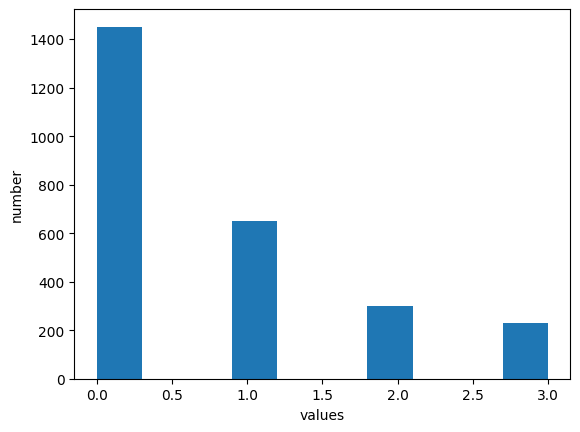

In [ ]:
plt.hist(y_predict)
plt.ylabel('number')
plt.xlabel('values')

In [ ]:
y_predict

,0
0,1
1,0
2,0
3,1
4,3
...,...
2622,3
2623,0
2624,0
2625,0


**Predicting the target class**


In [ ]:
print("Segment")
print(classifier.predict([[0,1,	37,1,	2,	8.0,	1,	4.0,	5]]))

Segment
[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
